# **Predictive Analytics Brain Stroke** 🧠

Stroke adalah salah satu penyebab kematian dan disabilitas utama di dunia, termasuk di Indonesia. Deteksi dini terhadap potensi risiko stroke menjadi sangat penting untuk menurunkan angka morbiditas dan mortalitas, khususnya pada populasi usia produktif. Dalam konteks ini, pengembangan sistem prediksi menggunakan Machine Learning (ML) bukan hanya menjadi wacana teknologi, melainkan solusi nyata yang berbasis data untuk mengantisipasi risiko stroke sejak dini. **Proyek ini dirancang dalam kerangka kerja predictive analytics, dengan tujuan memberikan insight medis awal berbasis gaya hidup dan faktor keseharian individu,** bukan semata-mata data medis seperti MRI atau CT scan. Artinya, kita bicara soal potensi prediksi yang murah, cepat, dan mudah diakses.

Secara strategis, solusi ini akan membuka peluang untuk program pencegahan berbasis data (data-driven prevention).

## **Business understanding**

### Project Description

Proyek ini berfokus pada **pengembangan model klasifikasi berbasis supervised machine learning untuk memprediksi kemungkinan seseorang terkena stroke, berdasarkan perilaku dan kebiasaan harian** seperti tingkat aktivitas fisik, pola makan, konsumsi alkohol, merokok, serta data demografis seperti usia, jenis kelamin, dan pekerjaan. Dataset yang digunakan mencakup beragam fitur yang relevan dengan potensi risiko stroke. Model ini diharapkan dapat memberikan prediksi yang akurat dan dapat dijadikan alat bantu bagi masyarakat luas maupun tenaga medis untuk mengenali risiko lebih awal dan mengambil tindakan preventif.

### Problem Statements

Tantangan utama dalam penanganan stroke adalah keterlambatan deteksi, yang sering kali baru diketahui ketika sudah terjadi serangan. Hal ini diperburuk dengan minimnya kesadaran masyarakat terhadap indikator awal yang mengarah ke stroke, serta keterbatasan akses terhadap fasilitas diagnostik medis canggih, terutama di daerah terpencil. Oleh karena itu, diperlukan suatu pendekatan berbasis teknologi yang dapat secara dini, cepat, dan berbasis kebiasaan sehari-hari mengidentifikasi individu yang berisiko tinggi terkena stroke. Permasalahan yang coba dipecahkan oleh proyek ini adalah: **bagaimana cara membangun sistem deteksi dini risiko stroke yang cepat, dan berbasis kebiasaan harian, dengan tingkat akurasi yang dapat diandalkan?**

### Goals

Tujuan utama dari proyek ini adalah membangun model prediksi yang dapat mengklasifikasikan individu ke dalam kategori risiko stroke atau tidak, berdasarkan fitur-fitur harian dan demografis yang mudah didapat. Secara rinci, tujuan-tujuan tersebut meliputi:

1. Menganalisis dan memahami pola data yang berkorelasi dengan insiden stroke.

2. Melakukan preprocessing yang tepat (encoding, scaling, dan handling imbalance).

3. Mengimplementasikan dan membandingkan tiga algoritma machine learning (Random Forest, KNN, dan Boost Classifier).

4. Mengevaluasi performa model berdasarkan metrik klasifikasi seperti accuracy, precision, recall, dan F1-score.

5. Meningkatkan awareness masyarakat melalui teknologi berbasis data dengan pendekatan preventif.

Model ini tidak ditujukan untuk menggantikan diagnosis dokter, tetapi sebagai sistem pendukung keputusan (decision support system) dalam rangka pencegahan.

### Dataset Requirements

Dataset yang digunakan bersumber dari [**Kaggle - Stroke Prediction Dataset**](https://www.kaggle.com/datasets/teamincribo/stroke-prediction?select=stroke_prediction_dataset.csv)  dan telah mengalami modifikasi pada beberapa fitur. Total terdapat 13 fitur input dan 1 fitur target (stroke). Fitur-fitur tersebut mencakup informasi demografi, gaya hidup, dan riwayat kesehatan, antara lain

1. **age** (usia)

2. **gender** (jenis kelamin)

3. **heart_disease** (riwayat penyakit jantung)

4. **work_type** (jenis pekerjaan)

5. **Residence_type** (domisili: urban/rural)

6. **avg_glucose_level** (rata-rata kadar glukosa darah)

7. **bmi** (indeks massa tubuh)

8. **smoking_status** (status merokok)

9. **alcohol_intake** (konsumsi alkohol)

10. **physical_activity** (tingkat aktivitas fisik)

11. **family_history_of_stroke** (riwayat keluarga)

12. **dietary_habits** (pola makan)

13. **stress_levels** (tingkat stres)

Target variabel adalah stroke (binary: 0 = tidak, 1 = ya).


## **Data understanding**

### Import Library

In [1]:
import os
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

### Data loading

Dataset yang kami gunakan diperoleh dari Kaggle dengan memanfaatkan API resmi yang disediakan oleh Kaggle. Kami mengakses dataset Stroke Prediction melalui pemanggilan API Kaggle, kemudian hasil unduhan berupa file ZIP. File ZIP tersebut diekstrak. Setelah diekstrak, dataset dikonversi ke dalam format yang dapat dibaca dan diolah.



In [2]:
!mkdir -p ~/.kaggle
!echo '{"username":"fajriharyanto","key":"998acd734e359f906329500715f20f7e"}' > ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d teamincribo/stroke-prediction

Dataset URL: https://www.kaggle.com/datasets/teamincribo/stroke-prediction
License(s): apache-2.0
  0% 0.00/628k [00:00<?, ?B/s]
100% 628k/628k [00:00<00:00, 364MB/s]


In [3]:
!unzip -q stroke-prediction.zip -d /content

In [4]:
!ls /content

README.md  sample_data	stroke_prediction_dataset.csv  stroke-prediction.zip


In [5]:
stroke_df = pd.read_csv("/content/stroke_prediction_dataset.csv")
stroke_df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


### Exploratory Data Analysis

Exploratory Data Analysis (EDA) adalah proses awal yang sangat penting dalam proyek analisis data. Tahapan ini bertujuan untuk memahami karakteristik dasar dari data, menemukan pola yang tersembunyi, serta mengidentifikasi potensi masalah yang bisa memengaruhi hasil analisis secara keseluruhan.

#### EDA - Deskripsi Variabel

In [6]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient ID                15000 non-null  int64  
 1   Patient Name              15000 non-null  object 
 2   Age                       15000 non-null  int64  
 3   Gender                    15000 non-null  object 
 4   Hypertension              15000 non-null  int64  
 5   Heart Disease             15000 non-null  int64  
 6   Marital Status            15000 non-null  object 
 7   Work Type                 15000 non-null  object 
 8   Residence Type            15000 non-null  object 
 9   Average Glucose Level     15000 non-null  float64
 10  Body Mass Index (BMI)     15000 non-null  float64
 11  Smoking Status            15000 non-null  object 
 12  Alcohol Intake            15000 non-null  object 
 13  Physical Activity         15000 non-null  object 
 14  Stroke

In [7]:
stroke_df.describe()

,Patient ID,Age,Hypertension,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stroke History,Stress Levels
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,49715.802867,54.035667,0.249000,0.502933,129.445209,27.474302,0.500267,5.022694
std,29000.656642,21.063111,0.432448,0.500008,40.487792,7.230201,0.500017,2.873223
min,1.000000,18.000000,0.000000,0.000000,60.000000,15.010000,0.000000,0.000000
25%,24562.000000,36.000000,0.000000,0.000000,94.517500,21.160000,0.000000,2.540000
50%,49448.000000,54.000000,0.000000,1.000000,128.900000,27.420000,1.000000,5.050000
75%,75112.000000,72.000000,0.000000,1.000000,164.592500,33.720000,1.000000,7.520000
max,99975.000000,90.000000,1.000000,1.000000,200.000000,40.000000,1.000000,10.000000


In [8]:
stroke_df.shape

(15000, 22)

Dataset yang digunakan terdiri dari 22 kolom dan 15000 baris data.

In [9]:
stroke_df.head()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke


In [10]:
stroke_df.tail()

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
14995,13981,Keya Iyer,88,Female,1,1,Divorced,Self-employed,Urban,160.22,...,Social Drinker,High,0,No,Paleo,1.12,171/92,"HDL: 44, LDL: 153",NaN,No Stroke
14996,87707,Anahita Virk,47,Female,0,0,Married,Private,Urban,107.58,...,Never,Low,1,No,Gluten-Free,1.47,155/71,"HDL: 35, LDL: 183",Difficulty Speaking,No Stroke
14997,33174,Ivana Kaur,35,Male,0,0,Married,Government Job,Rural,134.90,...,Rarely,High,1,No,Paleo,0.51,121/110,"HDL: 57, LDL: 159","Difficulty Speaking, Severe Fatigue, Headache",Stroke
14998,22343,Anvi Mannan,73,Male,0,0,Single,Self-employed,Urban,169.42,...,Never,High,0,Yes,Paleo,1.53,157/74,"HDL: 79, LDL: 91","Severe Fatigue, Numbness, Confusion, Dizziness...",No Stroke
14999,11066,Gokul Trivedi,64,Female,0,0,Single,Never Worked,Urban,186.88,...,Rarely,Moderate,0,No,Vegan,4.57,133/81,"HDL: 78, LDL: 179",Headache,Stroke


Beberapa fitur pada dataset, seperti **Patient ID, Patient Name, Hypertension, Symptoms, Marital Status, Cholesterol Levels, Blood Pressure Levels, dan Stroke History,** dianggap tidak relevan untuk analisis ini dan oleh karena itu diputuskan untuk **dihapus (drop).**

Alasan utama penghapusan adalah karena fitur-fitur tersebut mengandung informasi pribadi yang tidak berkontribusi langsung pada prediksi risiko stroke berdasarkan kebiasaan sehari-hari dan faktor medis yang lebih spesifik. Dengan demikian, penghapusan fitur-fitur ini bertujuan untuk meningkatkan fokus model pada variabel yang benar-benar berpengaruh serta menjaga privasi data pasien.

In [11]:
stroke_df.drop([
    'Patient ID',
    'Patient Name',
    'Hypertension',
    'Symptoms',
    'Marital Status',
    'Cholesterol Levels',
    'Blood Pressure Levels',
    'Stroke History'
], axis=1, inplace=True)

stroke_df.head()

,Age,Gender,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis
0,56,Male,1,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,Yes,Vegan,3.48,Stroke
1,80,Male,0,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,No,Paleo,1.73,Stroke
2,26,Male,1,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,Yes,Paleo,7.31,Stroke
3,73,Male,0,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,No,Paleo,5.35,No Stroke
4,51,Male,1,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,Yes,Pescatarian,6.84,Stroke


#### EDA - Menangani Missing Value dan Outliers

In [12]:
stroke_df.isnull().sum()

,0
Age,0
Gender,0
Heart Disease,0
Work Type,0
Residence Type,0
Average Glucose Level,0
Body Mass Index (BMI),0
Smoking Status,0
Alcohol Intake,0
Physical Activity,0


In [13]:
stroke_df.duplicated().sum()

np.int64(0)

Dataset yang dianalisis tidak memiliki duplikasi maupun missing values, sehingga tidak diperlukan proses pembersihan data pada aspek tersebut. Namun, untuk memastikan kualitas data secara menyeluruh, langkah selanjutnya yang direncanakan adalah melakukan deteksi dan penanganan terhadap kemungkinan adanya outlier. Analisis outlier ini bertujuan untuk mengidentifikasi nilai-nilai ekstrem yang dapat memengaruhi distribusi data atau hasil model secara signifikan.

In [14]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       15000 non-null  int64  
 1   Gender                    15000 non-null  object 
 2   Heart Disease             15000 non-null  int64  
 3   Work Type                 15000 non-null  object 
 4   Residence Type            15000 non-null  object 
 5   Average Glucose Level     15000 non-null  float64
 6   Body Mass Index (BMI)     15000 non-null  float64
 7   Smoking Status            15000 non-null  object 
 8   Alcohol Intake            15000 non-null  object 
 9   Physical Activity         15000 non-null  object 
 10  Family History of Stroke  15000 non-null  object 
 11  Dietary Habits            15000 non-null  object 
 12  Stress Levels             15000 non-null  float64
 13  Diagnosis                 15000 non-null  object 
dtypes: flo

<Axes: xlabel='Age'>

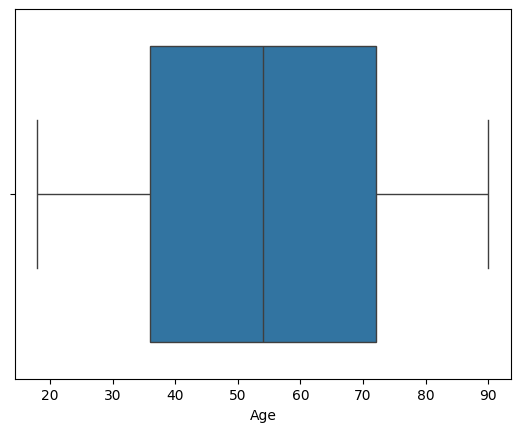

In [15]:
sns.boxplot(x=stroke_df['Age'])

<Axes: xlabel='Heart Disease'>

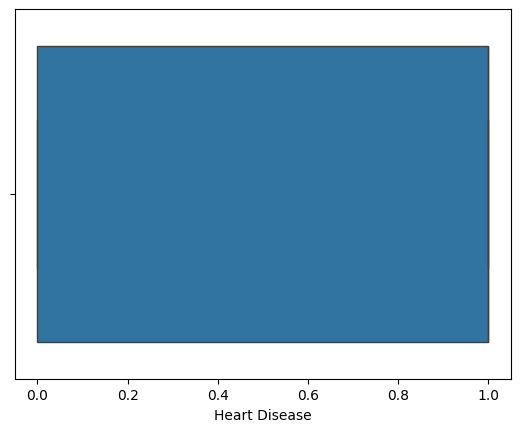

In [16]:
sns.boxplot(x=stroke_df['Heart Disease'])

<Axes: xlabel='Average Glucose Level'>

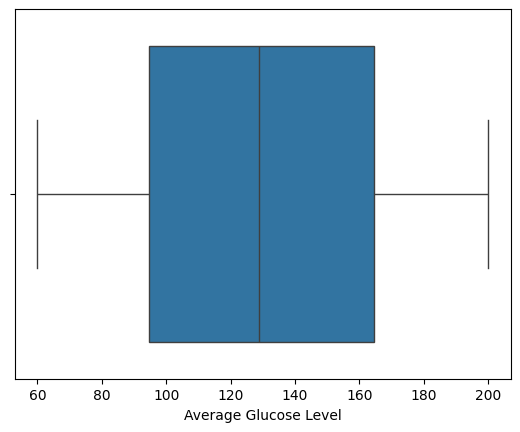

In [17]:
sns.boxplot(x=stroke_df['Average Glucose Level'])

<Axes: xlabel='Body Mass Index (BMI)'>

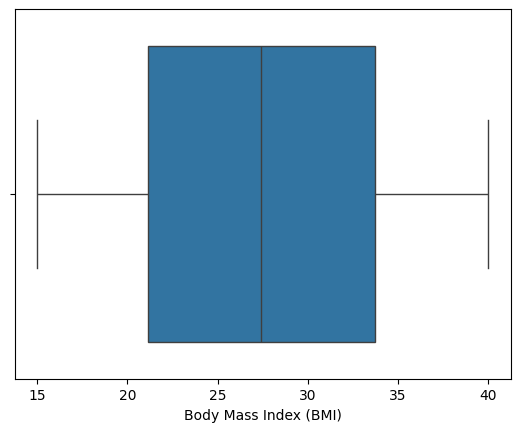

In [18]:
sns.boxplot(x=stroke_df['Body Mass Index (BMI)'])

<Axes: xlabel='Stress Levels'>

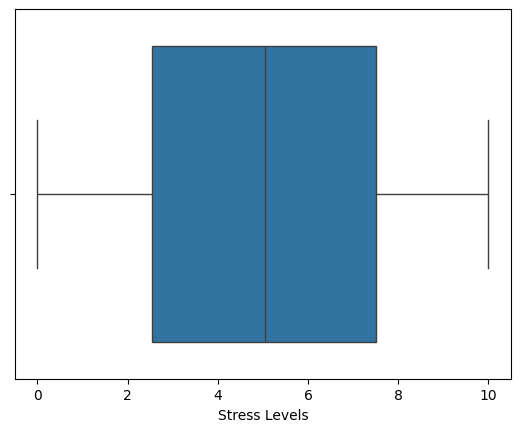

In [19]:
sns.boxplot(x=stroke_df['Stress Levels'])

In [20]:
num_features = ['Age', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']

In [21]:
Q1 = stroke_df[['Age', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']].quantile(0.25)
Q3 = stroke_df[['Age', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
stroke_df = stroke_df[
    (stroke_df['Age'] >= lower_bound['Age']) & (stroke_df['Age'] <= upper_bound['Age']) &
    (stroke_df['Heart Disease'] >= lower_bound['Heart Disease']) & (stroke_df['Heart Disease'] <= upper_bound['Heart Disease']) &
    (stroke_df['Average Glucose Level'] >= lower_bound['Average Glucose Level']) & (stroke_df['Average Glucose Level'] <= upper_bound['Average Glucose Level']) &
    (stroke_df['Body Mass Index (BMI)'] >= lower_bound['Body Mass Index (BMI)']) & (stroke_df['Body Mass Index (BMI)'] <= upper_bound['Body Mass Index (BMI)']) &
    (stroke_df['Stress Levels'] >= lower_bound['Stress Levels']) & (stroke_df['Stress Levels'] <= upper_bound['Stress Levels'])
]

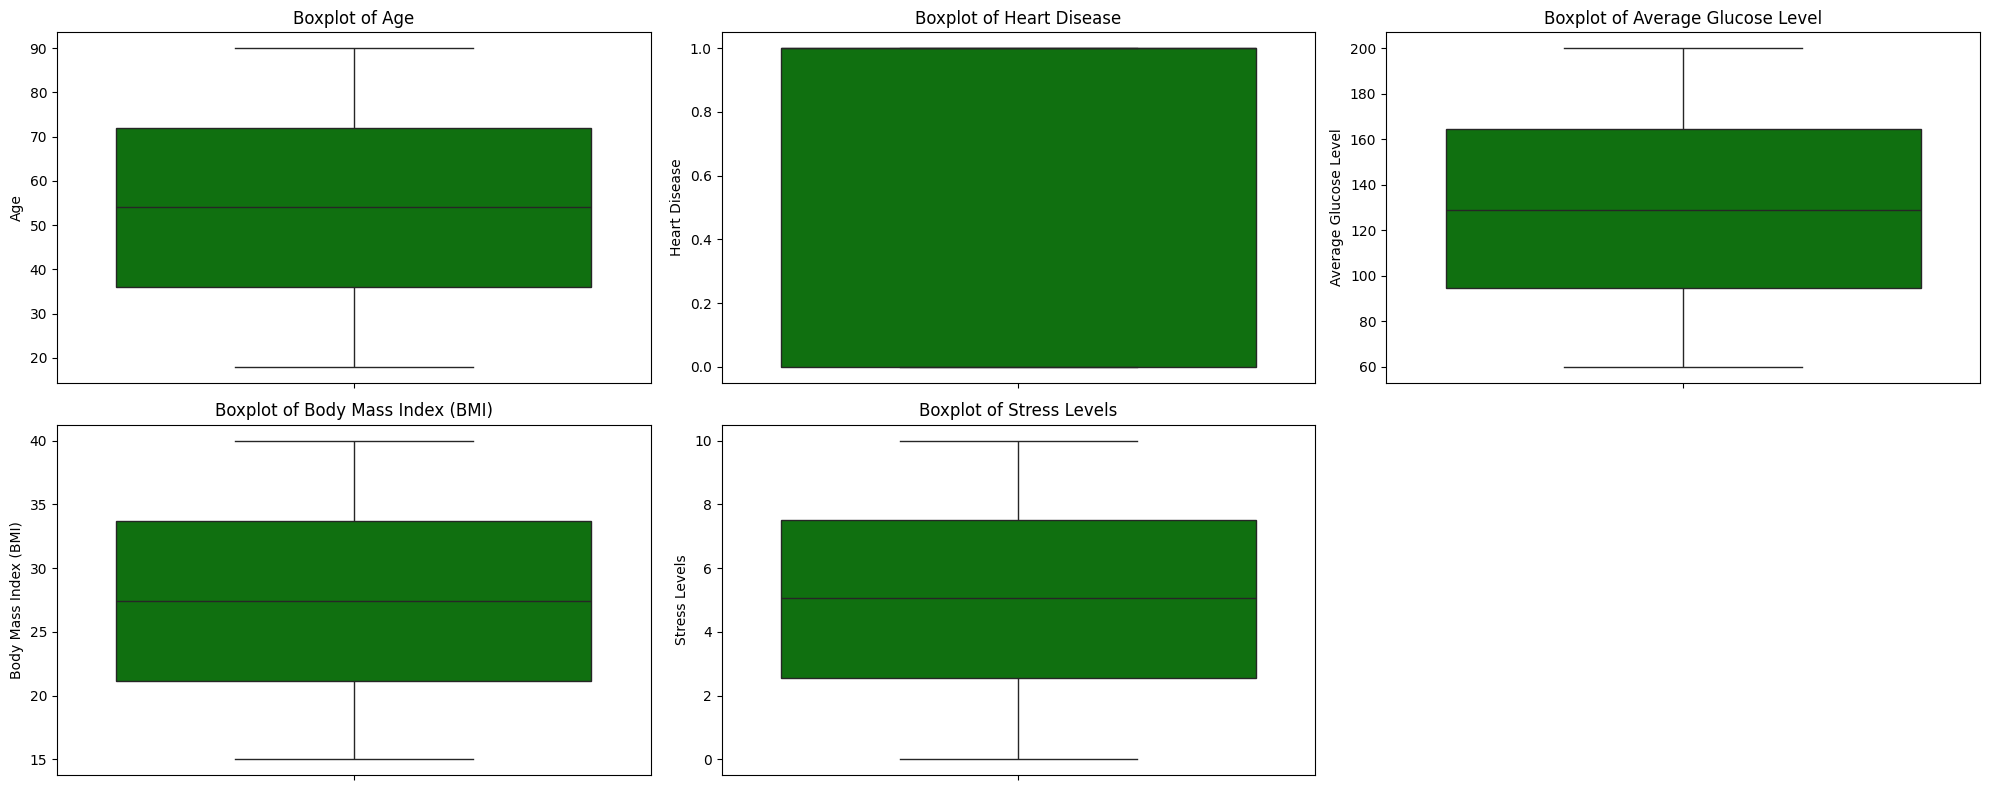

In [23]:
plt.figure(figsize=(20, 8))
for i, column in enumerate(num_features, 1):
    plt.subplot(2, (len(num_features) + 1) // 2, i)
    sns.boxplot(data=stroke_df, y=column, color="green")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [24]:
stroke_df.head()

,Age,Gender,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,Family History of Stroke,Dietary Habits,Stress Levels,Diagnosis
0,56,Male,1,Self-employed,Rural,130.91,22.37,Non-smoker,Social Drinker,Moderate,Yes,Vegan,3.48,Stroke
1,80,Male,0,Self-employed,Urban,183.73,32.57,Non-smoker,Never,Low,No,Paleo,1.73,Stroke
2,26,Male,1,Never Worked,Rural,189.00,20.32,Formerly Smoked,Rarely,High,Yes,Paleo,7.31,Stroke
3,73,Male,0,Never Worked,Urban,185.29,27.50,Non-smoker,Frequent Drinker,Moderate,No,Paleo,5.35,No Stroke
4,51,Male,1,Self-employed,Urban,177.34,29.06,Currently Smokes,Rarely,Low,Yes,Pescatarian,6.84,Stroke


#### EDA - Univariate Analysis

Dalam dataset ini, terdapat dua jenis fitur, yaitu numerical features dan categorical features. Untuk fitur numerik, rencananya akan dilakukan proses standardization menggunakan StandardScaler agar seluruh nilai memiliki skala yang seragam, sehingga tidak terjadi bias akibat perbedaan rentang nilai antar fitur.

Sementara itu, untuk fitur kategorikal, akan dilakukan proses encoding agar fitur tersebut dapat diubah ke dalam format numerik yang dapat diproses oleh model.

Tapi Sebelum itu mari lihat distribusi datanya terlebih dahulu

In [25]:
num_features = ['Age', 'Heart Disease', 'Average Glucose Level', 'Body Mass Index (BMI)', 'Stress Levels']
cat_features = ['Gender', 'Work Type', 'Residence Type', 'Smoking Status', 'Alcohol Intake', 'Physical Activity', 'Family History of Stroke', 'Dietary Habits', 'Diagnosis']

##### Categorical Features

        jumlah sampel  persentase
Gender                           
Male             7622        50.8
Female           7378        49.2


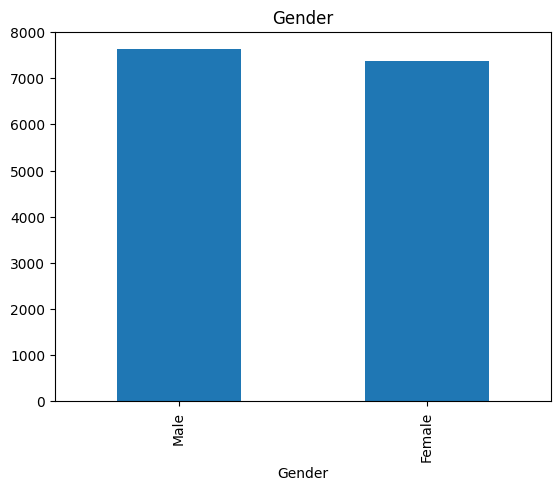

In [26]:
feature = cat_features[0]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
Work Type                                
Private                  3863        25.8
Self-employed            3855        25.7
Government Job           3710        24.7
Never Worked             3572        23.8


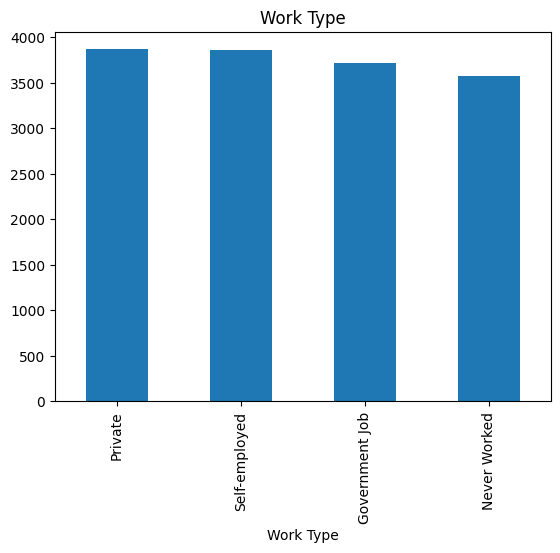

In [27]:
feature = cat_features[1]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
Residence Type                           
Rural                    7529        50.2
Urban                    7471        49.8


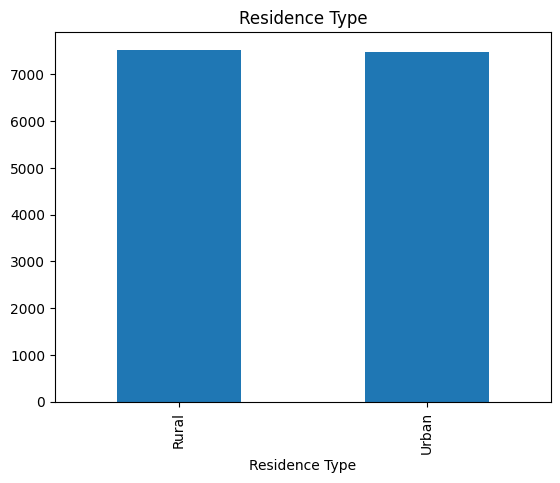

In [28]:
feature = cat_features[2]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                  jumlah sampel  persentase
Smoking Status                             
Currently Smokes           5011        33.4
Non-smoker                 5009        33.4
Formerly Smoked            4980        33.2


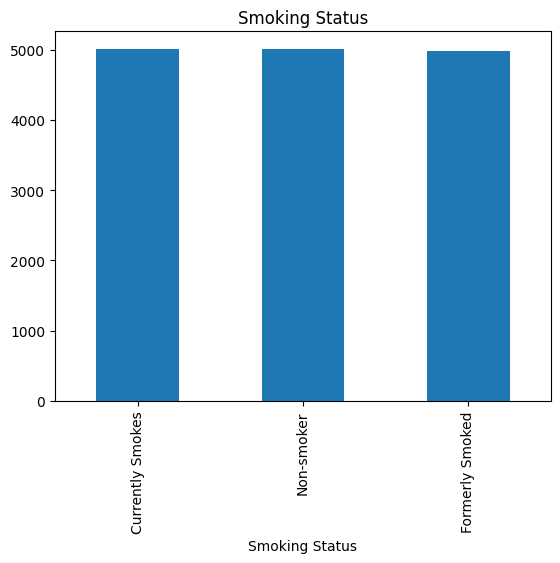

In [29]:
feature = cat_features[3]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                  jumlah sampel  persentase
Alcohol Intake                             
Rarely                     3821        25.5
Social Drinker             3745        25.0
Never                      3729        24.9
Frequent Drinker           3705        24.7


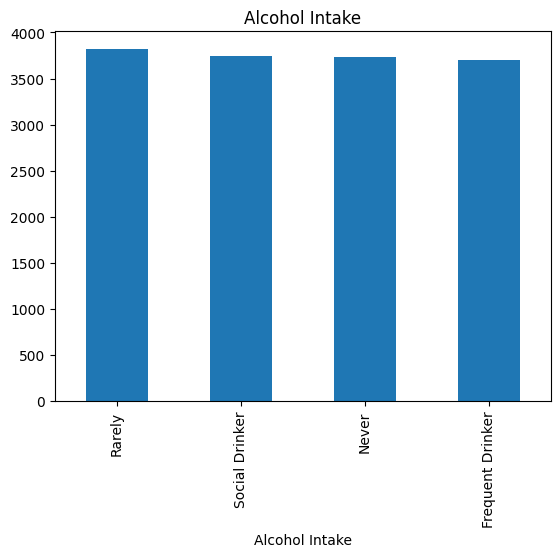

In [30]:
feature = cat_features[4]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                   jumlah sampel  persentase
Physical Activity                           
High                        5060        33.7
Moderate                    4998        33.3
Low                         4942        32.9


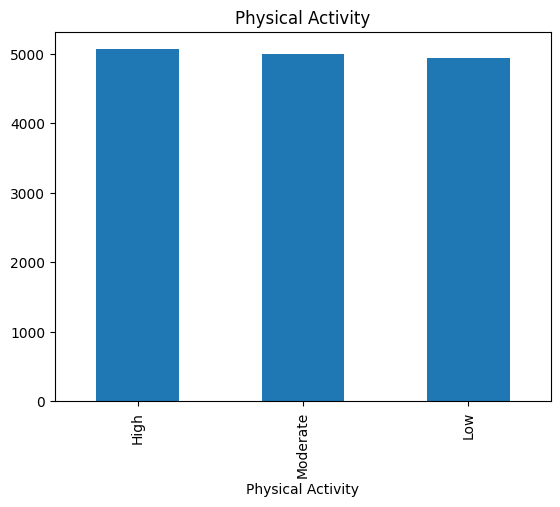

In [31]:
feature = cat_features[5]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                          jumlah sampel  persentase
Family History of Stroke                           
Yes                                7592        50.6
No                                 7408        49.4


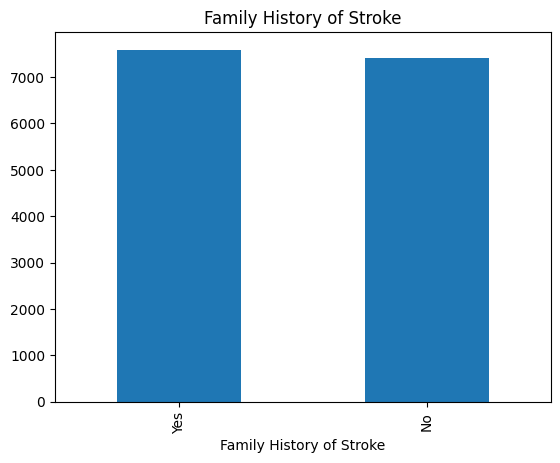

In [32]:
feature = cat_features[6]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

                jumlah sampel  persentase
Dietary Habits                           
Paleo                    2192        14.6
Vegan                    2185        14.6
Vegetarian               2170        14.5
Non-Vegetarian           2144        14.3
Keto                     2135        14.2
Pescatarian              2106        14.0
Gluten-Free              2068        13.8


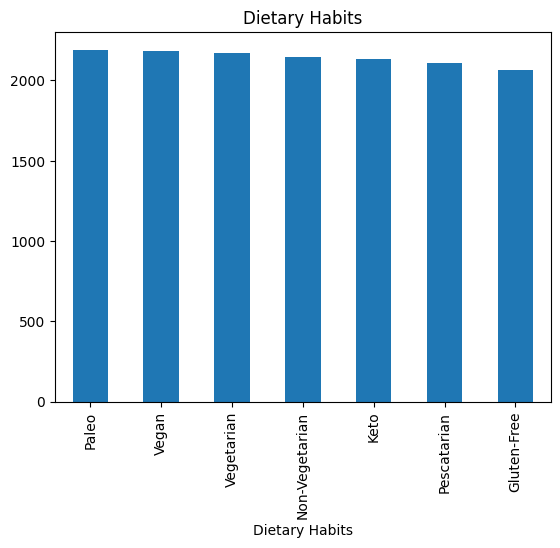

In [33]:
feature = cat_features[7]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

           jumlah sampel  persentase
Diagnosis                           
No Stroke           7532        50.2
Stroke              7468        49.8


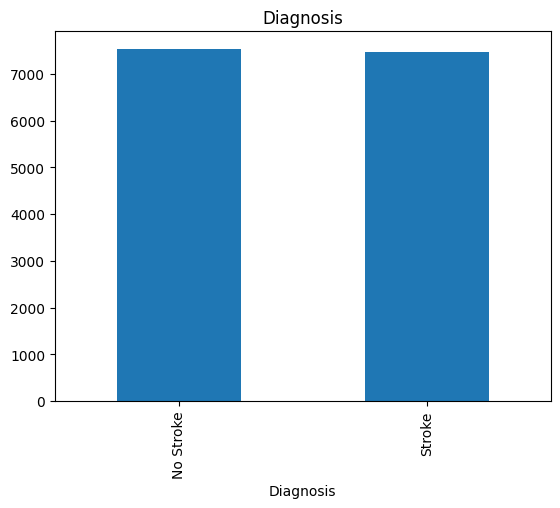

In [34]:
feature = cat_features[8]
count = stroke_df[feature].value_counts()
percent = 100*stroke_df[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

##### Numerical Features

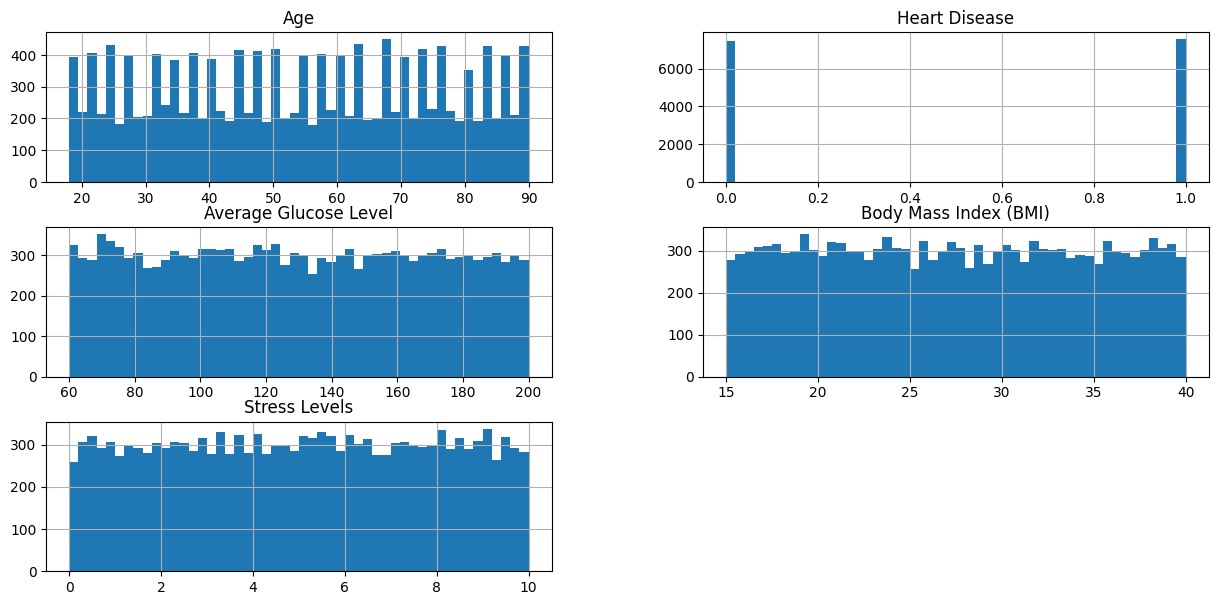

In [35]:
stroke_df.hist(bins=50, figsize=(15,7))
plt.show()

#### EDA - Multivariate Analysis

##### Categorical Features

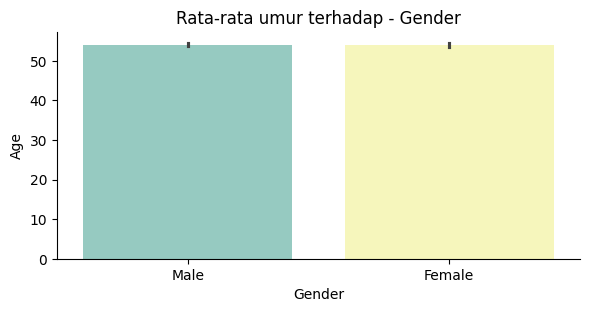

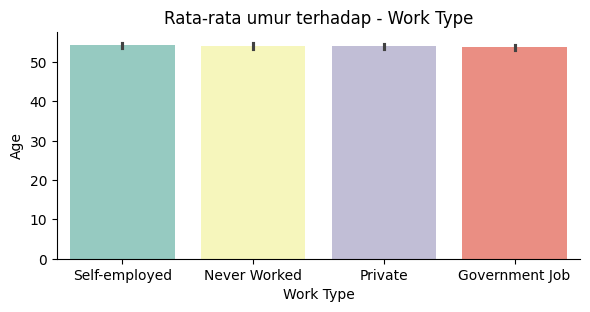

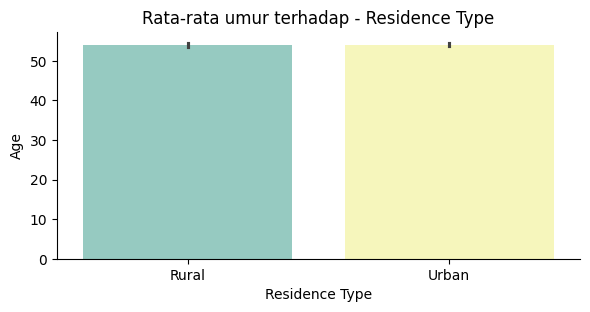

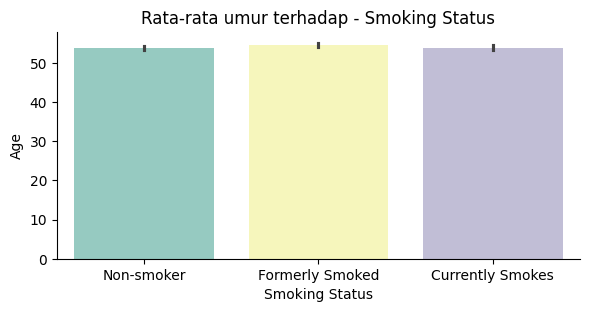

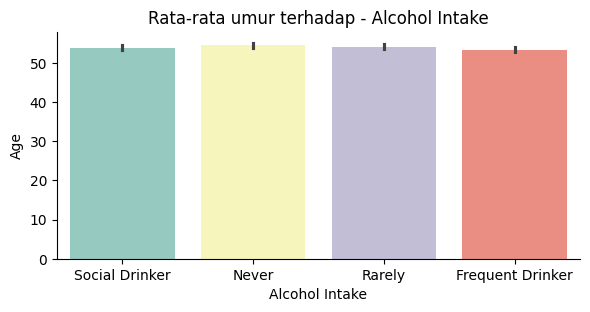

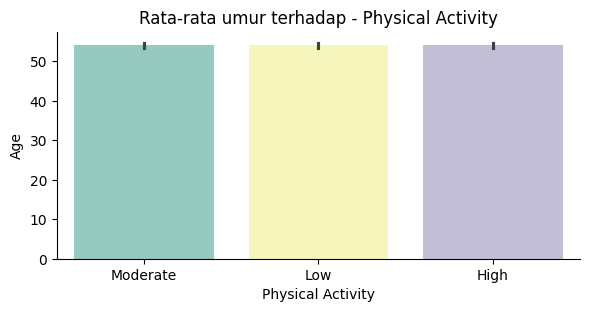

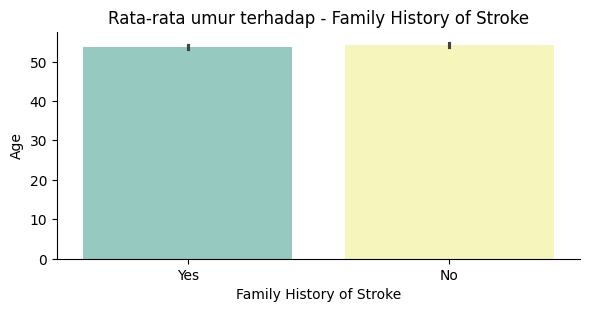

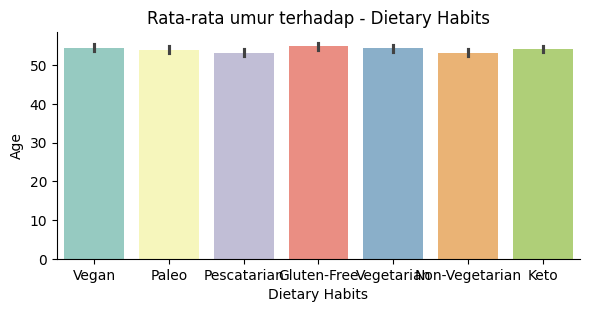

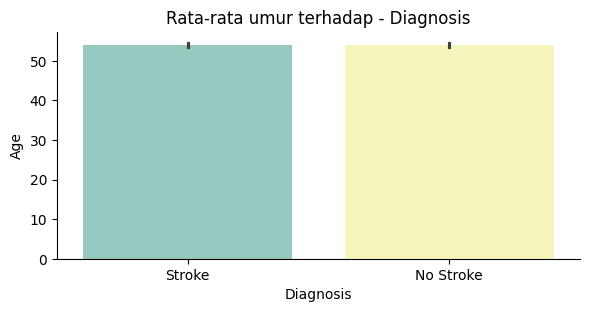

In [36]:
cat_features = stroke_df.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="Age", kind="bar", dodge=False, height=3, aspect=2, data=stroke_df, hue=col, palette="Set3", legend=False)
  plt.title("Rata-rata umur terhadap - {}".format(col))

plt.show()

##### Numerical Features

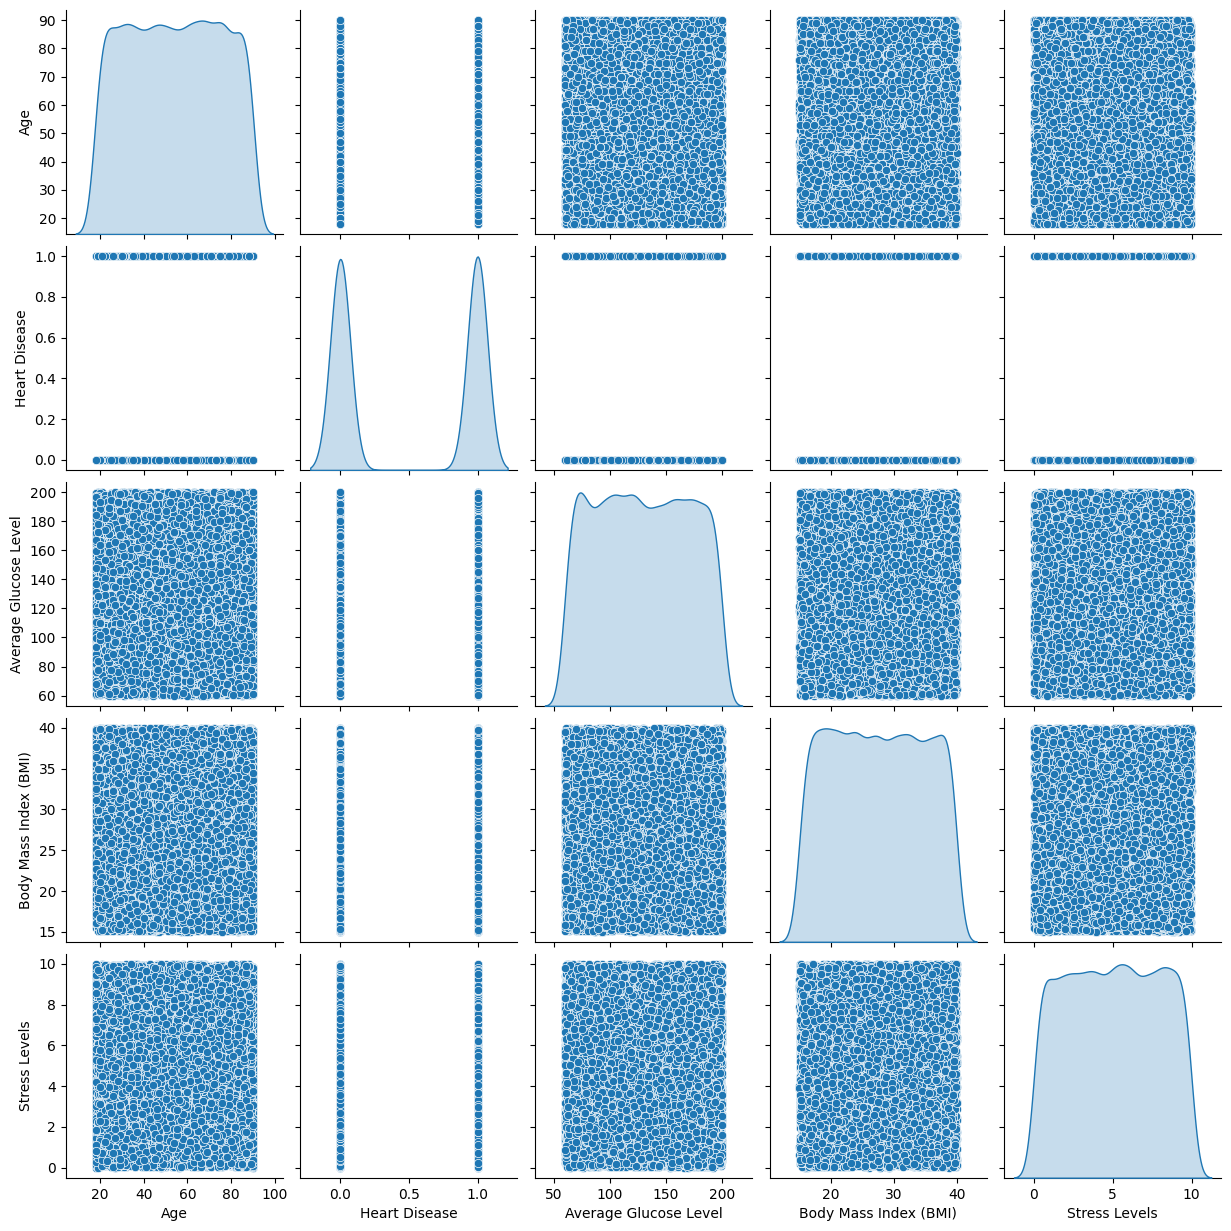

In [37]:
sns.pairplot(stroke_df, diag_kind='kde', height=2.5)
plt.show()

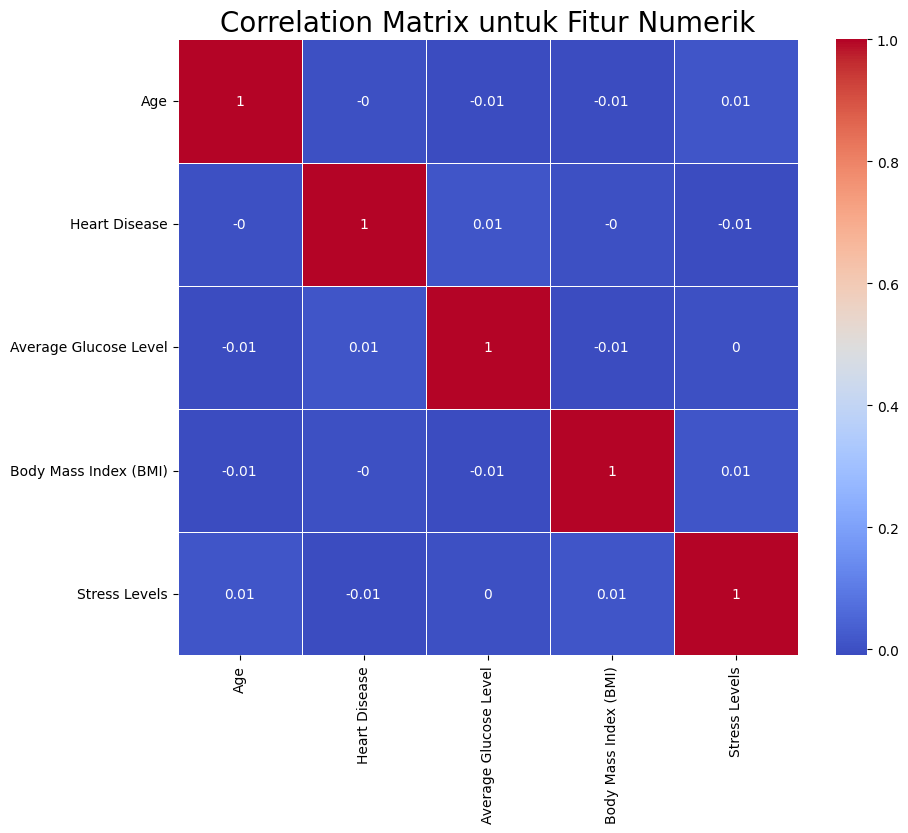

In [38]:
correlation_matrix = stroke_df[num_features].corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)
plt.show()

## **Data preparation**

### Category Feature Encoding

In [39]:
le = LabelEncoder()
stroke_df['Gender encode'] = le.fit_transform(stroke_df['Gender'])

In [40]:
stroke_df['Work Type encode'] = le.fit_transform(stroke_df['Work Type'])

In [41]:
stroke_df['Residence Type encode'] = le.fit_transform(stroke_df['Residence Type'])

In [42]:
stroke_df['Smoking Status encode'] = le.fit_transform(stroke_df['Smoking Status'])

In [43]:
stroke_df['Alcohol Intake encode'] = le.fit_transform(stroke_df['Alcohol Intake'])

In [44]:
stroke_df['Physical Activity encode'] = le.fit_transform(stroke_df['Physical Activity'])

In [45]:
stroke_df['Family History of Stroke encode'] = le.fit_transform(stroke_df['Family History of Stroke'])

In [46]:
stroke_df['Dietary Habits encode'] = le.fit_transform(stroke_df['Dietary Habits'])

In [47]:
stroke_df['Diagnosis encode'] = le.fit_transform(stroke_df['Diagnosis'])

In [48]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Age                              15000 non-null  int64  
 1   Gender                           15000 non-null  object 
 2   Heart Disease                    15000 non-null  int64  
 3   Work Type                        15000 non-null  object 
 4   Residence Type                   15000 non-null  object 
 5   Average Glucose Level            15000 non-null  float64
 6   Body Mass Index (BMI)            15000 non-null  float64
 7   Smoking Status                   15000 non-null  object 
 8   Alcohol Intake                   15000 non-null  object 
 9   Physical Activity                15000 non-null  object 
 10  Family History of Stroke         15000 non-null  object 
 11  Dietary Habits                   15000 non-null  object 
 12  Stress Levels     

### Standarisasi

In [49]:
scaler = StandardScaler()

stroke_df[num_features] = scaler.fit_transform(stroke_df[num_features])

In [50]:
stroke_df.head()

,Age,Gender,Heart Disease,Work Type,Residence Type,Average Glucose Level,Body Mass Index (BMI),Smoking Status,Alcohol Intake,Physical Activity,...,Diagnosis,Gender encode,Work Type encode,Residence Type encode,Smoking Status encode,Alcohol Intake encode,Physical Activity encode,Family History of Stroke encode,Dietary Habits encode,Diagnosis encode
0,0.093263,Male,0.994150,Self-employed,Rural,0.036180,-0.705993,Non-smoker,Social Drinker,Moderate,...,Stroke,1,3,0,2,3,2,1,5,1
1,1.232733,Male,-1.005884,Self-employed,Urban,1.340814,0.704803,Non-smoker,Never,Low,...,Stroke,1,3,1,2,1,1,0,3,1
2,-1.331076,Male,0.994150,Never Worked,Rural,1.470981,-0.989536,Formerly Smoked,Rarely,High,...,Stroke,1,1,0,1,2,0,1,3,1
3,0.900388,Male,-1.005884,Never Worked,Urban,1.379345,0.003554,Non-smoker,Frequent Drinker,Moderate,...,No Stroke,1,1,1,2,0,2,0,3,0
4,-0.144127,Male,0.994150,Self-employed,Urban,1.182983,0.219323,Currently Smokes,Rarely,Low,...,Stroke,1,3,1,0,2,1,1,4,1


### Train-Test-Split

Seluruh fitur kategorikal yang telah melalui proses encoding kemudian digabungkan dengan fitur numerik untuk membentuk satu kesatuan data bernama all features. Data inilah yang selanjutnya digunakan sebagai input untuk membangun dan melatih model algoritma machine learning. Dalam proses ini, beberapa algoritma akan dikompilasi dan dibandingkan, antara lain Random Forest, K-Nearest Neighbors (KNN), dan algoritma Boosting.

In [51]:
encode_features = ['Gender encode', 'Work Type encode', 'Residence Type encode', 'Smoking Status encode', 'Alcohol Intake encode', 'Physical Activity encode', 'Family History of Stroke encode', 'Dietary Habits encode', 'Diagnosis encode']

In [52]:
all_features = (num_features + encode_features)

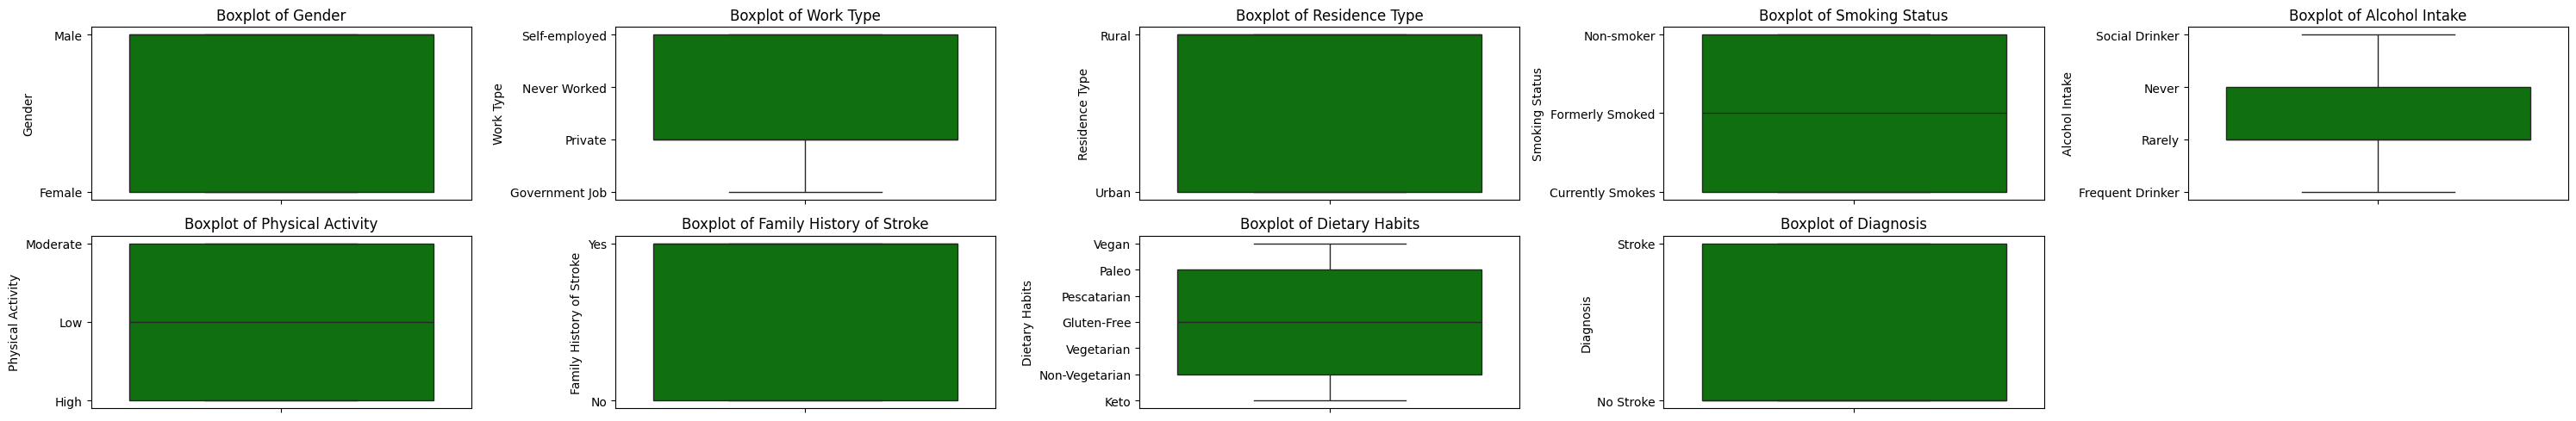

In [53]:
plt.figure(figsize=(30, 5))
for i, column in enumerate(cat_features, 1):
    plt.subplot(2, (len(cat_features) + 1) // 2, i)
    sns.boxplot(data=stroke_df, y=column, color="green")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


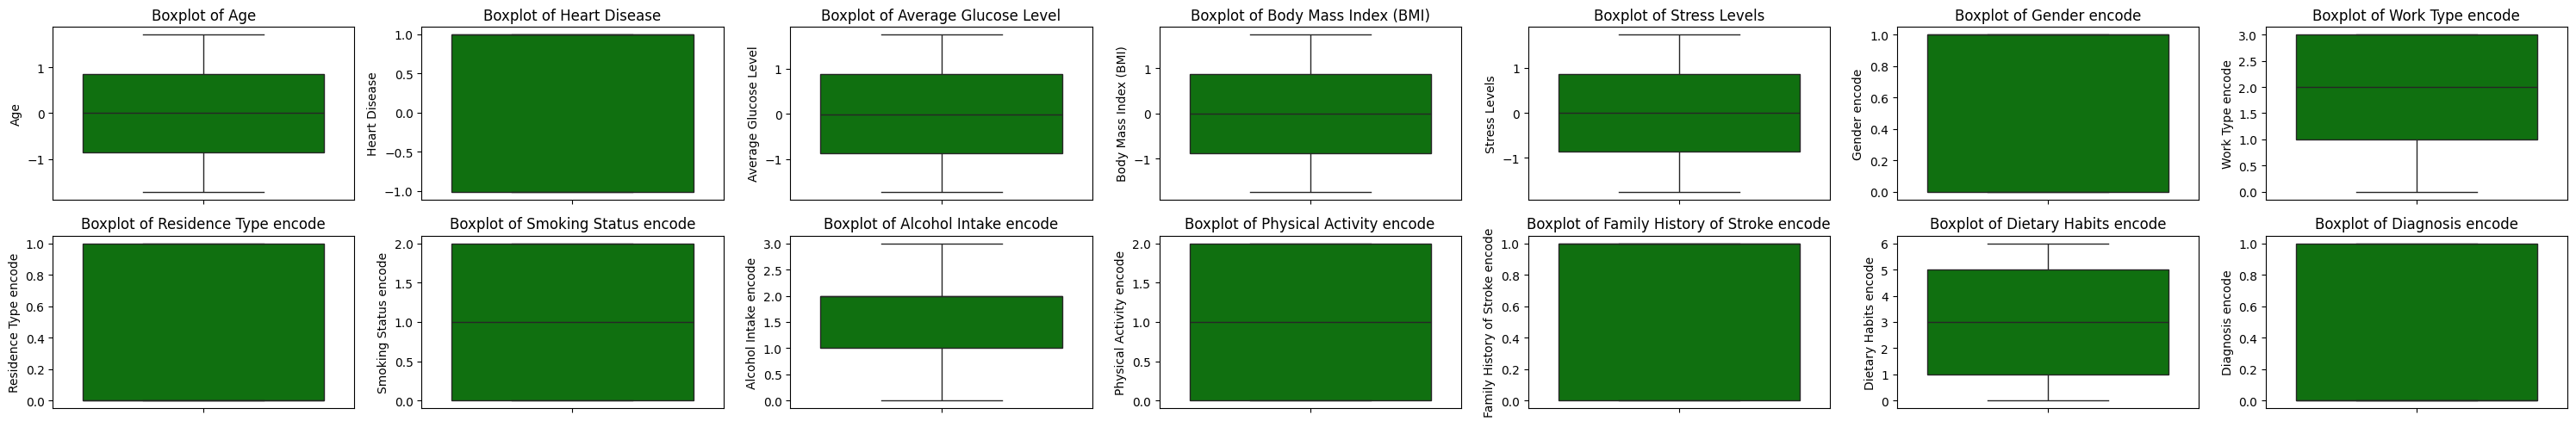

In [54]:
plt.figure(figsize=(30, 5))
for i, column in enumerate(all_features, 1):
    plt.subplot(2, (len(all_features) + 1) // 2, i)
    sns.boxplot(data=stroke_df, y=column, color="green")
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()


In [55]:
stroke_df.describe()

,Age,Heart Disease,Average Glucose Level,Body Mass Index (BMI),Stress Levels,Gender encode,Work Type encode,Residence Type encode,Smoking Status encode,Alcohol Intake encode,Physical Activity encode,Family History of Stroke encode,Dietary Habits encode,Diagnosis encode
count,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.193712e-16,5.305386e-17,-1.534772e-16,-2.150576e-16,-1.487403e-16,0.508133,1.52420,0.498067,0.999867,1.507067,0.995867,0.506133,3.024533,0.497867
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,0.499951,1.12168,0.500013,0.817340,1.115063,0.818878,0.499979,1.994441,0.500012
min,-1.710900e+00,-1.005884e+00,-1.715271e+00,-1.723979e+00,-1.748163e+00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.562965e-01,-1.005884e+00,-8.627013e-01,-8.733523e-01,-8.641086e-01,0.000000,1.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,-1.693380e-03,9.941504e-01,-1.346645e-02,-7.510692e-03,9.503930e-03,1.000000,2.00000,0.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000
75%,8.529097e-01,9.941504e-01,8.681250e-01,8.638635e-01,8.691944e-01,1.000000,3.00000,1.000000,2.000000,2.000000,2.000000,1.000000,5.000000,1.000000
max,1.707513e+00,9.941504e-01,1.742677e+00,1.732471e+00,1.732365e+00,1.000000,3.00000,1.000000,2.000000,3.000000,2.000000,1.000000,6.000000,1.000000


Variabel Y adalah label atau target output yang merepresentasikan kondisi akhir terkait stroke, yang dikelompokkan ke dalam empat kategori: aman, berpotensi tinggi, stroke ringan/sedang, dan stroke parah. Kategori ini ditentukan berdasarkan skor risiko yang dihitung dari perbandingan nilai masing-masing fitur terhadap ambang batas (threshold) rata-rata pada pasien yang sudah mengalami stroke. Pembentukan variabel Y ini bertujuan untuk mengklasifikasikan tingkat risiko atau kondisi stroke seseorang secara lebih granular.

In [56]:
# Buat kolom baru: Smoking Status Encode (0 = sering merokok, 1 = tidak merokok)
def encode_smoking(smoking_val):
    return 0 if smoking_val < 0.5 else 1

stroke_df['Smoking Status encode'] = stroke_df['Smoking Status encode'].apply(encode_smoking)

# Hitung threshold dari data Diagnosis encode = 1 (sudah terkena stroke)
diagnosis_positive = stroke_df[stroke_df['Diagnosis encode'] == 1]

thresholds = {
    'Age': diagnosis_positive['Age'].mean(),
    'Heart Disease': diagnosis_positive['Heart Disease'].mean(),
    'Average Glucose Level': diagnosis_positive['Average Glucose Level'].mean(),
    'Family History of Stroke encode': diagnosis_positive['Family History of Stroke encode'].mean(),
    'Stress Levels': diagnosis_positive['Stress Levels'].mean(),
    'Smoking Status encode': diagnosis_positive['Smoking Status encode'].mean(),
}

In [57]:
def classify_stroke(row):
    score = 0

    # Komponen risiko (dibandingkan threshold penderita stroke)
    if row['Age'] >= thresholds['Age']:
        score += 1
    if row['Heart Disease'] >= thresholds['Heart Disease']:
        score += 1
    if row['Average Glucose Level'] >= thresholds['Average Glucose Level']:
        score += 1
    if row['Family History of Stroke encode'] >= thresholds['Family History of Stroke encode']:
        score += 1
    if row['Stress Levels'] >= thresholds['Stress Levels']:
        score += 1
    if row['Smoking Status encode'] <= thresholds['Smoking Status encode']:  # Sering merokok
        score += 1

    # Skor maksimum: 6, minimum: 0
    if row['Diagnosis encode'] == 1:
        # Sudah terkena stroke
        if score >= 5:
            return 3  # Stroke parah (faktor-faktor sangat tinggi)
        else:
            return 2  # Stroke ringan/sedang
    else:
        # Belum terkena stroke
        if score >= 4:
            return 1  # Berpotensi tinggi
        else:
            return 0  # Aman

stroke_df['Diagnosis Stroke'] = stroke_df.apply(classify_stroke, axis=1)

Variabel X merupakan kumpulan fitur independen yang digunakan sebagai input untuk memprediksi kemungkinan terjadinya stroke. Fitur-fitur ini mencakup sejumlah faktor risiko seperti usia, riwayat penyakit jantung, kadar glukosa rata-rata, riwayat keluarga terkait stroke, tingkat stres, serta status merokok yang telah melalui proses encoding. Semua fitur tersebut telah diproses dan distandarkan agar siap digunakan dalam pemodelan machine learning.

In [58]:
x = stroke_df[all_features].drop('Age', axis =1)
y = stroke_df['Diagnosis Stroke']

columns_to_scale = x.columns
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [59]:
print(f'Jumlah total sampel dalam seluruh dataset: {len(x)}')
print(f'Jumlah total sampel dalam dataset pelatihan (train): {len(X_train)}')
print(f'Jumlah total sampel dalam dataset pengujian (test): {len(X_test)}')

Jumlah total sampel dalam seluruh dataset: 15000
Jumlah total sampel dalam dataset pelatihan (train): 12000
Jumlah total sampel dalam dataset pengujian (test): 3000


In [60]:
train_distribution = y_train.value_counts()
print("Distribusi Target pada Training Set:")
train_distribution

Distribusi Target pada Training Set:


,count
Diagnosis Stroke,
2,5449
0,4253
1,1773
3,525


Distribusi target pada training set menunjukkan ketidakseimbangan kelas (class imbalance) dalam diagnosis stroke. Dari hasil pembagian data dengan proporsi 80:20 untuk training dan testing, diperoleh distribusi sebagai berikut: kelas 2 (berpotensi tinggi stroke) sebanyak 5.449 data, kelas 0 (aman) sebanyak 4.253 data, kelas 1 (stroke ringan/sedang) sebanyak 1.773 data, dan kelas 3 (stroke parah) sebanyak 525 data.

## **Modeling**

### Determining the Classification Algorithm

Pemilihan tiga algoritma—K-Nearest Neighbors (KNN), Random Forest, dan Boosting Algorithm—dilakukan untuk membandingkan performa dari pendekatan yang berbeda.

**KNN** digunakan karena sederhana dan efektif dalam mengenali pola berdasarkan kedekatan data.

**Random Forest** dipilih karena mampu menangani data kompleks dan mengurangi risiko overfitting melalui metode ensemble.

Sementara **Boosting Algorithm** digunakan karena kekuatannya dalam meningkatkan akurasi model secara bertahap dengan memperbaiki kesalahan dari model sebelumnya.

### K-Nearest Neighbor

In [61]:
knn = KNeighborsClassifier(
    n_neighbors=30,
    weights='distance',
    metric='minkowski',
    p=1
)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30, p=1, weights='distance')

### Random Forest

In [62]:
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=15,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=123,
    class_weight='balanced'
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=4, min_samples_split=10,
                       n_estimators=300, random_state=123)

### Boosting Algorithm

In [63]:
boost = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    random_state=42
)

boost.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=300,
                           random_state=42, subsample=0.8)

## **Evaluation**

### Performance Report Boosting Algorithm

In [64]:
models = {
    'K-Nearest Neighbor': knn,
    'Random Forest': rf,
    'Boosting': boost
}

hasil = {}

for nama, model in models.items():
    pred = model.predict(X_test)
    hasil[nama] = [
        accuracy_score(y_test, pred) * 100,
        precision_score(y_test, pred, average='macro') * 100,
        recall_score(y_test, pred, average='macro') * 100,
        f1_score(y_test, pred, average='macro') * 100
    ]

df = pd.DataFrame(hasil, index=["Accuracy", "Precision", "Recall", "F1 Score"])
print("Ringkasan Hasil Metrik Evaluasi Lengkap:")
print(df.round(2))


Ringkasan Hasil Metrik Evaluasi Lengkap:
           K-Nearest Neighbor  Random Forest  Boosting
Accuracy                87.50          89.00     89.20
Precision               86.62          79.98     80.57
Recall                  66.47          90.86     79.36
F1 Score                69.38          83.47     79.94


In [65]:
print("\nAkurasi Training dan Test:")
for name, model in models.items():
  y_train_pred = model.predict(X_train)
  train_acc = accuracy_score(y_train, y_train_pred) * 100
  y_test_pred = model.predict(X_test)
  test_acc = accuracy_score(y_test, y_test_pred) * 100
  print(f"{name}:")
  print(f"  Akurasi Train: {train_acc:.2f}%")
  print(f"  Akurasi Test: {test_acc:.2f}%")


Akurasi Training dan Test:
K-Nearest Neighbor:
  Akurasi Train: 100.00%
  Akurasi Test: 87.50%
Random Forest:
  Akurasi Train: 94.10%
  Akurasi Test: 89.00%
Boosting:
  Akurasi Train: 99.41%
  Akurasi Test: 89.20%


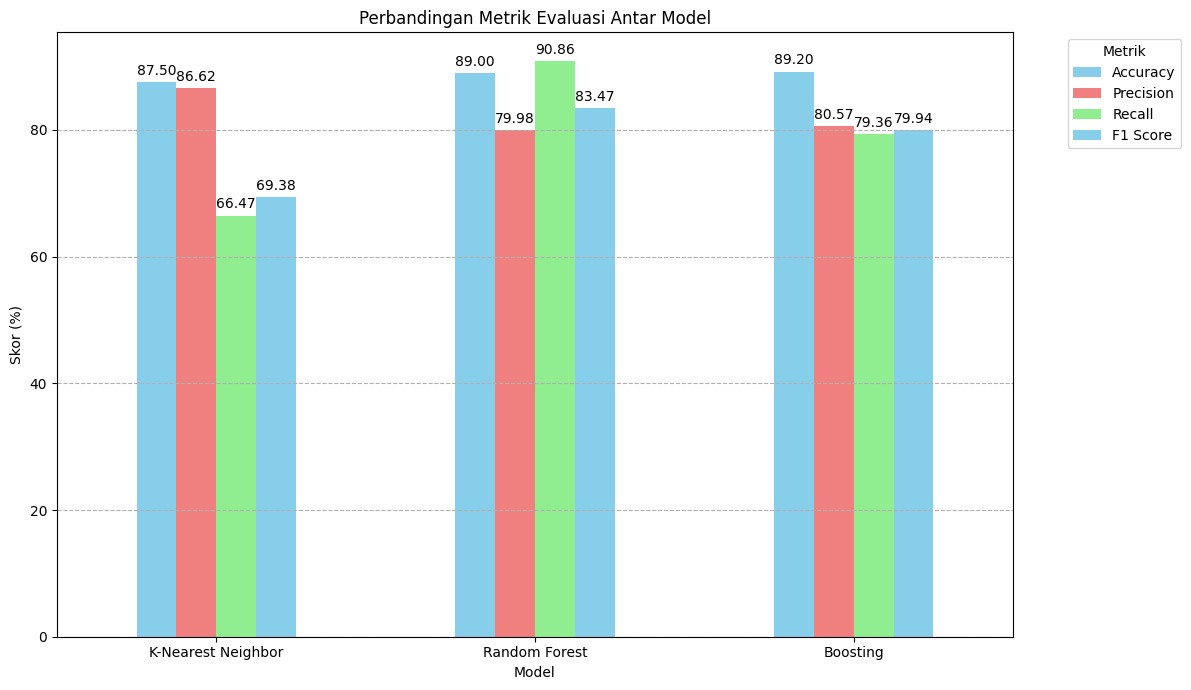

In [66]:
colors = ['skyblue', 'lightcoral', 'lightgreen']
ax = df.T.plot(kind='bar', figsize=(12, 7), color=colors)

plt.title('Perbandingan Metrik Evaluasi Antar Model')
plt.xlabel('Model')
plt.ylabel('Skor (%)')
plt.xticks(rotation=0)
plt.legend(title='Metrik', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

plt.show()

**K-Nearest Neighbors (KNN)** menunjukkan performa yang cukup baik dengan akurasi pengujian sebesar 87,50% dan akurasi pelatihan mencapai 100%, yang mengindikasikan kemungkinan overfitting. Precision-nya berada di angka 86,62%, namun nilai recall cukup rendah, yaitu 66,47%, **yang berarti model ini kurang sensitif dalam mendeteksi seluruh kasus stroke.** Hal ini berdampak pada F1 Score yang hanya mencapai 69,38%, menandakan keseimbangan antara precision dan recall masih kurang optimal untuk klasifikasi yang kompleks.




**Random Forest** memberikan hasil yang lebih seimbang dan unggul dalam deteksi kasus stroke, terlihat dari recall yang sangat tinggi sebesar 90,86%, menjadikannya efektif dalam menangkap hampir semua kasus stroke yang ada. Akurasi pengujian berada di angka 89,00%, sementara akurasi pelatihan sebesar 94,10%, menunjukkan generalisasi model yang baik. Meskipun precision hanya 79,98%, nilai F1 Score sebesar 83,47% menunjukkan **bahwa model ini cukup konsisten dalam menjaga keseimbangan antara presisi dan sensitivitas.**




**Boosting Algorithm** mencatatkan akurasi pengujian tertinggi yaitu 89,20% dan akurasi pelatihan 99,41%, menunjukkan performa yang sangat baik namun sedikit rawan overfitting. Nilai precision (80,57%) dan recall (79,36%) berada pada tingkat yang seimbang, menghasilkan F1 Score sebesar 79,94%. Ini menunjukkan bahwa Boosting mampu menangani **distribusi kelas dengan cukup efektif dan memiliki performa stabil dalam mendeteksi berbagai kategori stroke.**